# Analyzing the presence of hospitals in US counties

In [1]:
import os
import mplleaflet
import geopandas as gpd
import shapely
# import fiona

In [3]:
os.chdir('..')

In [4]:
path = os.getcwd() + '//hospitals//'
POLYGON_FILE = path + 'gadm36_USA_2.shp'
POINTS_FILE = path + 'Hospitals.shp'

In [23]:
## Reading polygons
us_counties = gpd.read_file(POLYGON_FILE)
print(len(us_counties))

3148


In [25]:
us_counties

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,USA,United States,USA.1_1,Alabama,None,USA.1.1_1,Autauga,None,None,County,County,None,US.AL.AU,"POLYGON ((-86.81896 32.34027, -86.81084 32.347..."
1,USA,United States,USA.1_1,Alabama,None,USA.1.2_1,Baldwin,None,None,County,County,None,US.AL.BD,"MULTIPOLYGON (((-87.51056 30.33972, -87.51083 ..."
2,USA,United States,USA.1_1,Alabama,None,USA.1.3_1,Barbour,None,None,County,County,None,US.AL.BR,"POLYGON ((-85.13026 31.76386, -85.13504 31.768..."
3,USA,United States,USA.1_1,Alabama,None,USA.1.4_1,Bibb,None,None,County,County,None,US.AL.BI,"POLYGON ((-87.42078 32.87446, -87.42028 32.971..."
4,USA,United States,USA.1_1,Alabama,None,USA.1.5_1,Blount,None,None,County,County,None,US.AL.BU,"POLYGON ((-86.95322 33.81542, -86.95449 33.845..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,USA,United States,USA.51_1,Wyoming,None,USA.51.19_1,Sweetwater,None,None,County,County,None,US.WY.SW,"POLYGON ((-110.00014 40.99923, -110.04850 40.9..."
3144,USA,United States,USA.51_1,Wyoming,None,USA.51.20_1,Teton,None,None,County,County,None,US.WY.TE,"POLYGON ((-111.04494 43.50049, -111.04498 43.5..."
3145,USA,United States,USA.51_1,Wyoming,None,USA.51.21_1,Uinta,None,None,County,County,None,US.WY.UI,"POLYGON ((-110.04850 40.99883, -110.05729 40.9..."
3146,USA,United States,USA.51_1,Wyoming,None,USA.51.22_1,Washakie,None,None,County,County,None,US.WY.WA,"POLYGON ((-107.10772 43.49963, -107.14559 43.4..."


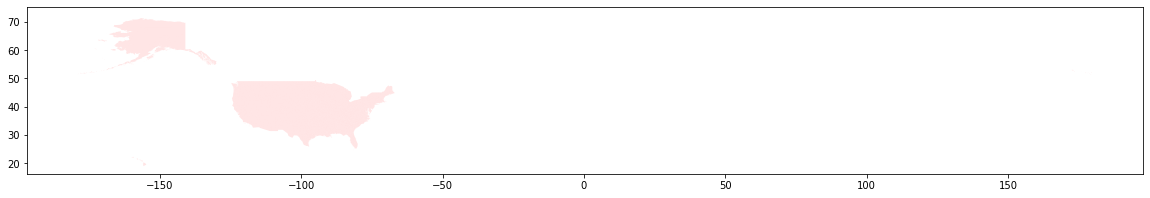

In [9]:
plot0 = us_counties.plot(color = 'red', alpha = 0.1, figsize=(20, 20))
# mplleaflet.show(fig=plot0.figure, crs=us_counties.crs, tiles='cartodb_positron', path='counties.html')
plot0

In [17]:
## Geometry of a polygon
polygons_list[0]['geometry']

{'type': 'Polygon',
 'coordinates': [[(-86.81896209716791, 32.340270996093864),
   (-86.81083679199219, 32.34712982177746),
   (-86.8097915649414, 32.35351181030279),
   (-86.81034851074219, 32.35852050781256),
   (-86.8158340454101, 32.37034988403332),
   (-86.8239974975586, 32.37852859497082),
   (-86.83107757568354, 32.383979797363395),
   (-86.83544921875, 32.391250610351506),
   (-86.84198760986328, 32.398071289062614),
   (-86.84527587890625, 32.404441833496094),
   (-86.8458633422851, 32.41400909423828),
   (-86.84478759765625, 32.416740417480526),
   (-86.84262084960932, 32.41812133789074),
   (-86.83611297607422, 32.420410156250114),
   (-86.8296127319336, 32.42271041870123),
   (-86.82743835449219, 32.42407989501953),
   (-86.82636260986328, 32.425910949707145),
   (-86.8280029296875, 32.42773056030285),
   (-86.83071899414057, 32.42953872680664),
   (-86.84159851074207, 32.432701110839844),
   (-86.84649658203125, 32.43632888793957),
   (-86.8497695922851, 32.43859100341797)

In [10]:
# ## READING POINTS
# points = fiona.open(POINTS_FILE)
# print("READING POINTS")
# points_list = []
# for pt in points:
#     points_list.append(pt)
# print("# OF POINTS ->", len(points_list))
hospitals = gpd.read_file(POINTS_FILE)
hospitals

,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,1,0005793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,06,PROPRIETARY,-999,49.0,NOT AVAILABLE,N,POINT (-13318894.759 4346975.444)
1,2,0053391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,06,PROPRIETARY,-999,62.0,NOT AVAILABLE,N,POINT (-13226507.273 4049625.553)
2,3,0011190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,06,PROPRIETARY,-999,127.0,NOT AVAILABLE,N,POINT (-13156201.046 4031977.723)
3,4,0017090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,(323) 462-2271,GENERAL ACUTE CARE,...,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,06,PROPRIETARY,-999,100.0,NOT AVAILABLE,N,POINT (-13171904.894 4041752.386)
4,5,0023691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,06,PROPRIETARY,-999,95.0,NOT AVAILABLE,N,POINT (-13132075.105 4037269.759)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,7577,0181742223,BLANCHFIELD ARMY COMMUNITY HOSPITAL,650 JOEL DRIVE,FORT CAMPBELL,KY,42223,NOT AVAILABLE,(270) 798-8400,MILITARY,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,21,GOVERNMENT - FEDERAL,-999,-999.0,NOT AVAILABLE,Y,POINT (-9734609.446 4388579.513)
7577,7578,0181840121,IRELAND ARMY COMMUNITY HOSPITAL,289 IRELAND AVE.,FORT KNOX,KY,40121,NOT AVAILABLE,(502) 624-9333,MILITARY,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,21,GOVERNMENT - FEDERAL,-999,-999.0,NOT AVAILABLE,Y,POINT (-9566957.060 4565358.610)
7578,7579,0181992055,NAVAL HOSPITAL CAMP PENDLETON,"200 MERCY CIRCLE , CAMP PENDLETON",OCEANSIDE,CA,92055,NOT AVAILABLE,(760) 725-4357,MILITARY,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,06,GOVERNMENT - FEDERAL,-999,-999.0,NOT AVAILABLE,Y,POINT (-13067661.942 3924716.953)
7579,7580,0182096919,NAVAL HOSPITAL GUAM,"FARENHOLT AVE., BLDG 50",AGANA HEIGHTS,GU,96919,NOT AVAILABLE,(671) 344-9242,MILITARY,...,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,66,GOVERNMENT - FEDERAL,-999,-999.0,NOT AVAILABLE,Y,POINT (16112005.925 1514076.602)


In [21]:
## Properties of a point
points_list[0]['properties']

OrderedDict([('FID', 1),
             ('ID', '0005793230'),
             ('NAME', 'CENTRAL VALLEY GENERAL HOSPITAL'),
             ('ADDRESS', '1025 NORTH DOUTY STREET'),
             ('CITY', 'HANFORD'),
             ('STATE', 'CA'),
             ('ZIP', '93230'),
             ('ZIP4', 'NOT AVAILABLE'),
             ('TELEPHONE', 'NOT AVAILABLE'),
             ('TYPE', 'GENERAL ACUTE CARE'),
             ('STATUS', 'CLOSED'),
             ('POPULATION', 49),
             ('COUNTY', 'KINGS'),
             ('COUNTYFIPS', '06031'),
             ('COUNTRY', 'USA'),
             ('LATITUDE', 36.33615885000006),
             ('LONGITUDE', -119.64566729799998),
             ('NAICS_CODE', '622110'),
             ('NAICS_DESC', 'GENERAL MEDICAL AND SURGICAL HOSPITALS'),
             ('SOURCE', 'http://www.oshpd.ca.gov/HID/Facility-Listing.html'),
             ('SOURCEDATE', '2016-02-04'),
             ('VAL_METHOD', 'IMAGERY/OTHER'),
             ('VAL_DATE', '2014-02-10'),
             ('WEB

In [22]:
## Geometry of a point
points_list[0]['geometry']

{'type': 'Point', 'coordinates': (-13318894.7592, 4346975.444300003)}

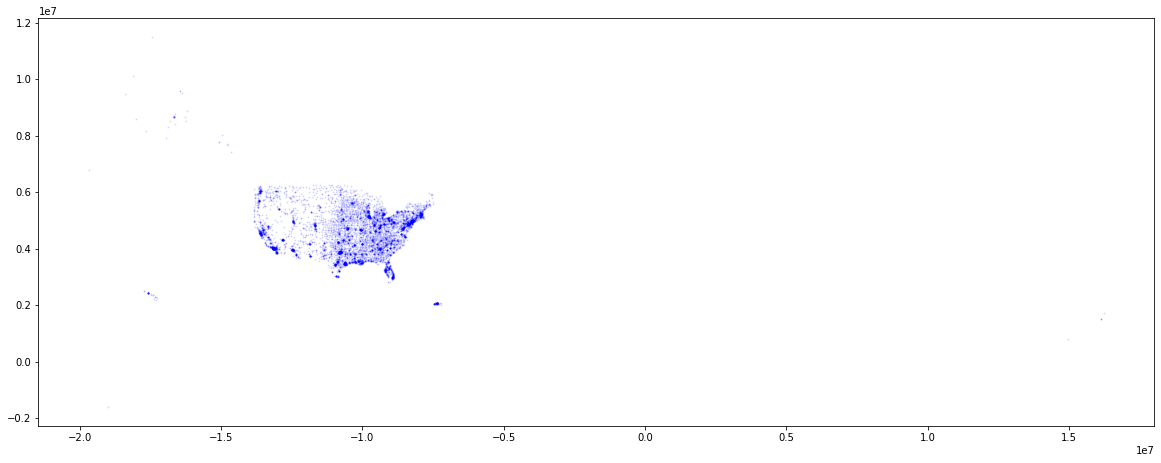

In [21]:
# import matplotlib.pyplot as plt
# f, ax = plt.subplots(1)
# us_counties.plot(ax=ax)
# hospitals.plot(ax=ax,cmap=None,)
# plt.show()
import numpy as np
val = np.ceil(np.abs(np.random.randn(len(hospitals)))) * 50
hospitals.plot(color = 'blue', alpha = 0.1, figsize=(20, 20), markersize = 1)

In [22]:
# len(hospitals)
val

array([100.,  50.,  50., ..., 100.,  50.,  50.])